In [232]:
from neural_priors.utils.data import Subject
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [233]:
subject = '08'

In [234]:
sub = Subject(subject, bids_folder='/data/ds-neuralpriors')

In [235]:
pars = sub.get_prf_parameters_volume(1, cross_validated=False, keys=['mu', 'r2', 'cvr2'], 
                                     roi='NPCr')


pars['cvr2'] = np.clip(-1, 1, pars['cvr2'])

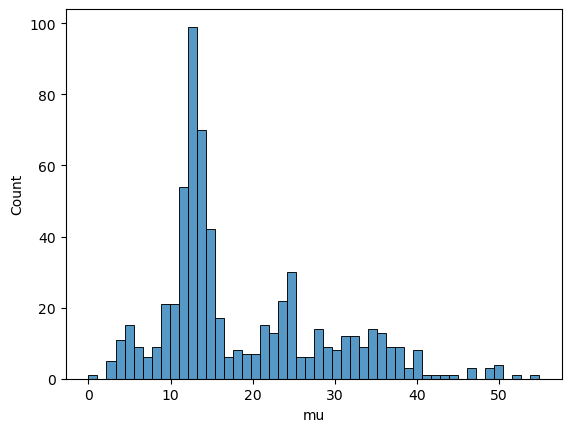

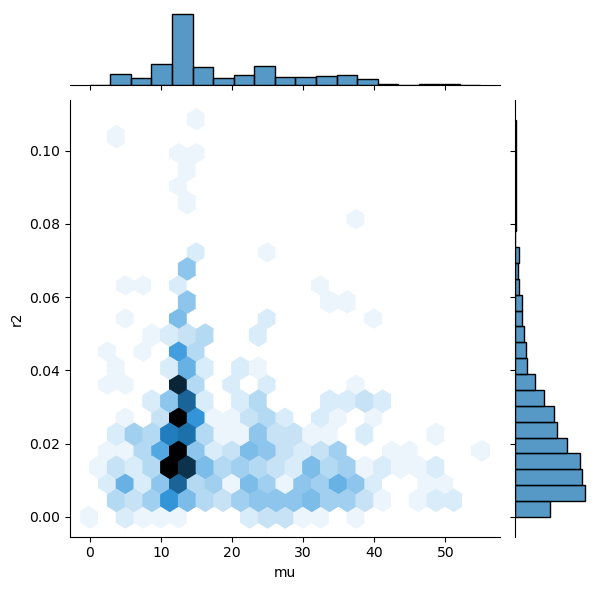

In [236]:
import seaborn as sns

sns.histplot(pars['mu'], bins=50)

sns.jointplot(x=pars['mu'], y=pars['r2'], kind='hex')

In [237]:
pars_im = sub.get_prf_parameters_volume(1, cross_validated=False, keys=['mu', 'r2', 'cvr2'], return_image=True,
                                        smoothed=True,
                                     roi='NPCr')

In [238]:
single_trials = sub.get_single_trial_estimates(1, smoothed=True)

In [239]:
npc_mask = sub.get_volume_mask('NPCr', 1, epi_space=True)

In [240]:
from nilearn.maskers import NiftiMasker

masker = NiftiMasker(mask_img=npc_mask, standardize=False)

In [241]:
behavior = sub.get_behavioral_data(1, tasks=['estimation_task'])
single_trial_activations = pd.DataFrame(masker.fit_transform(single_trials))

single_trial_activations.index = pd.Index(behavior['n'], name='n')

In [242]:
r2_index = pars['r2'].sort_values(ascending=False).index


var_n = single_trial_activations.groupby('n').var()

In [243]:

pars['cvr2'].max()

0.06985256

(-0.2, 0.1)

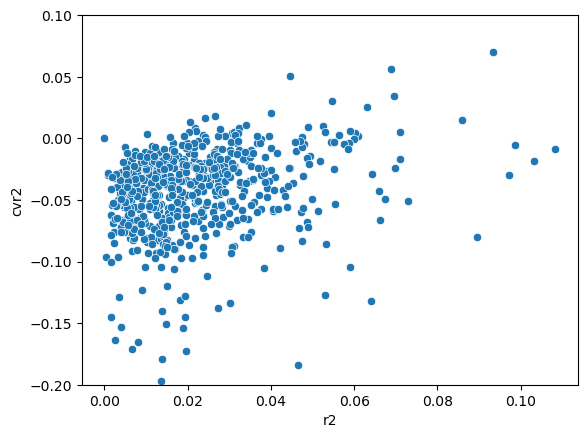

In [244]:
pars['cvr2'] = np.clip(pars['cvr2'], -1, 1)
sns.scatterplot(x='r2', y='cvr2', data=pars)
plt.ylim(-.2, .1)

In [245]:
(pars['cvr2']> 0.0).sum()

39

(31, 42)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.93236,41,two-sided,0.000014,"[0.09, 0.21]",0.76108,1464.031,0.997841


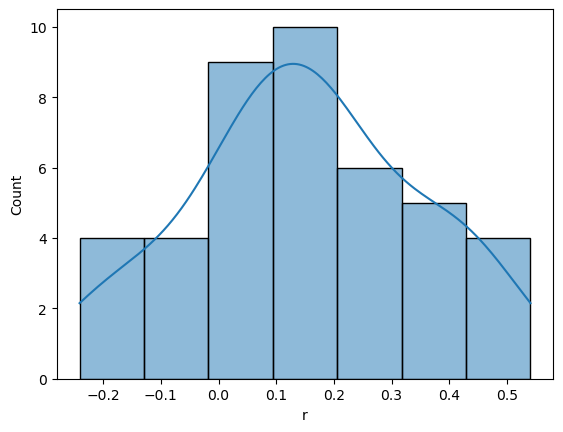

In [246]:
mask = pars['r2'] > 0.05

import pingouin as pg

mean_activations = single_trial_activations.loc[:, mask].groupby('n').mean()
print(mean_activations.shape)
var_activations = single_trial_activations.loc[:, mask].groupby('n').std()


mean_activations.columns.name = 'voxel'
var_activations.columns.name = 'voxel'

tmp = mean_activations.stack().to_frame('mean_activity').join(var_activations.stack().to_frame('var activity'))

r = tmp.groupby('voxel').apply(lambda d: pg.corr(d['mean_activity'], y=d['var activity']))

sns.histplot(r['r'], kde=True)

# pg.rm_corr(data=tmp.reset_index(), x='mean_activity', y='var activity', subject='n')

pg.ttest(r['r'], 0)

In [247]:
r.sort_values('p-val', ascending=True) 
#sns.histplot( r['p-val'],)

,,n,r,CI95%,p-val,BF10,power
voxel,,,,,,,
63,pearson,28,0.540604,"[0.21, 0.76]",0.002978,15.553,0.866594
463,pearson,28,0.491944,"[0.15, 0.73]",0.007838,6.775,0.780534
145,pearson,28,0.439052,"[0.08, 0.7]",0.019417,3.158,0.666870
364,pearson,28,0.435458,"[0.07, 0.7]",0.020552,3.013,0.658634
18,pearson,28,0.413381,"[0.05, 0.68]",0.028776,2.283,0.607211
460,pearson,28,0.409064,"[0.04, 0.68]",0.030660,2.168,0.597036
582,pearson,28,0.402025,"[0.03, 0.67]",0.033944,1.996,0.580399
153,pearson,28,0.392313,"[0.02, 0.67]",0.038934,1.786,0.557397
288,pearson,28,0.319948,"[-0.06, 0.62]",0.096960,0.871,0.390984


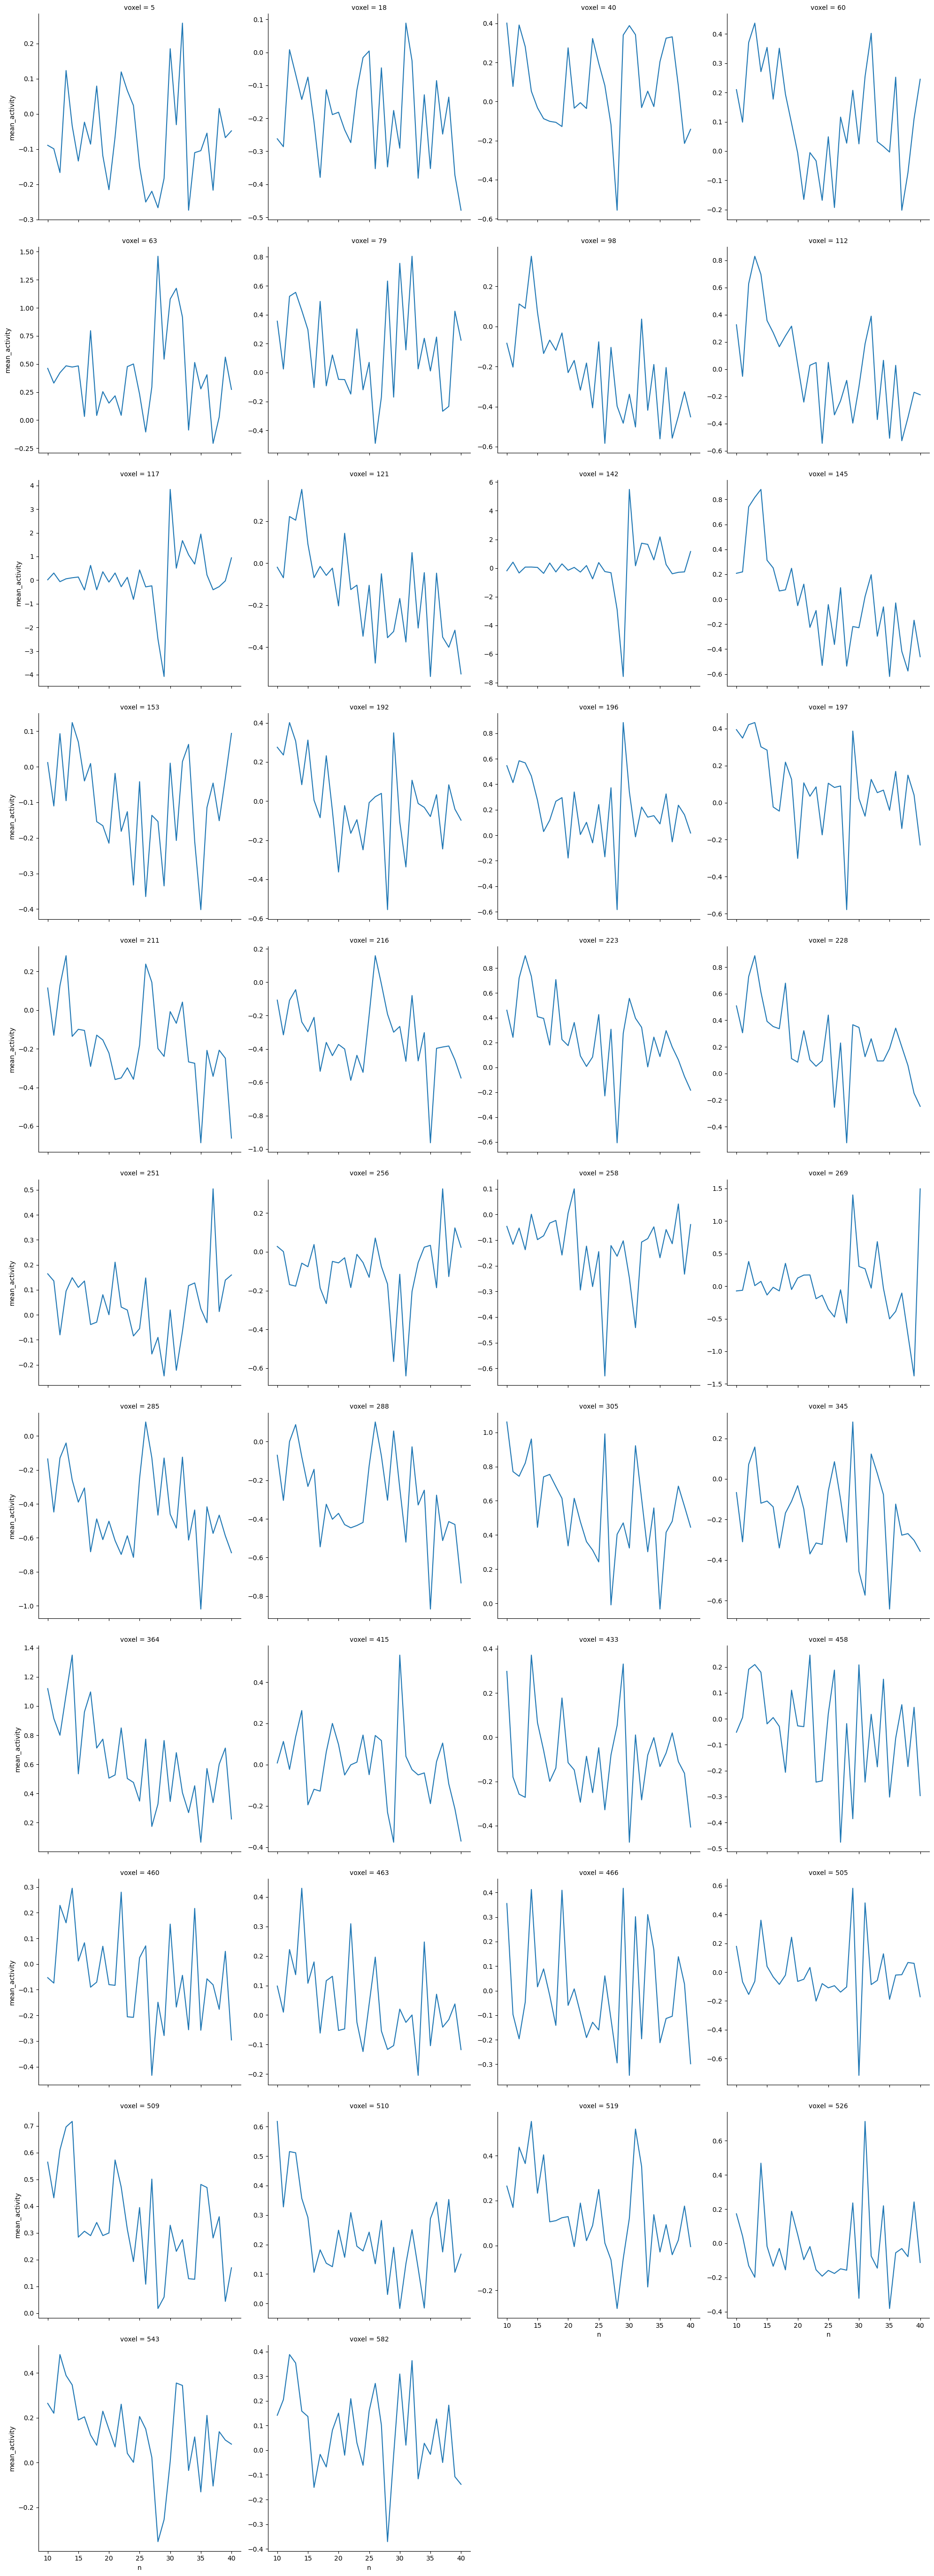

In [248]:
sns.relplot(x='n', y='mean_activity', col='voxel', data=tmp.reset_index(), kind='line', col_wrap=4, facet_kws={'sharey':False})

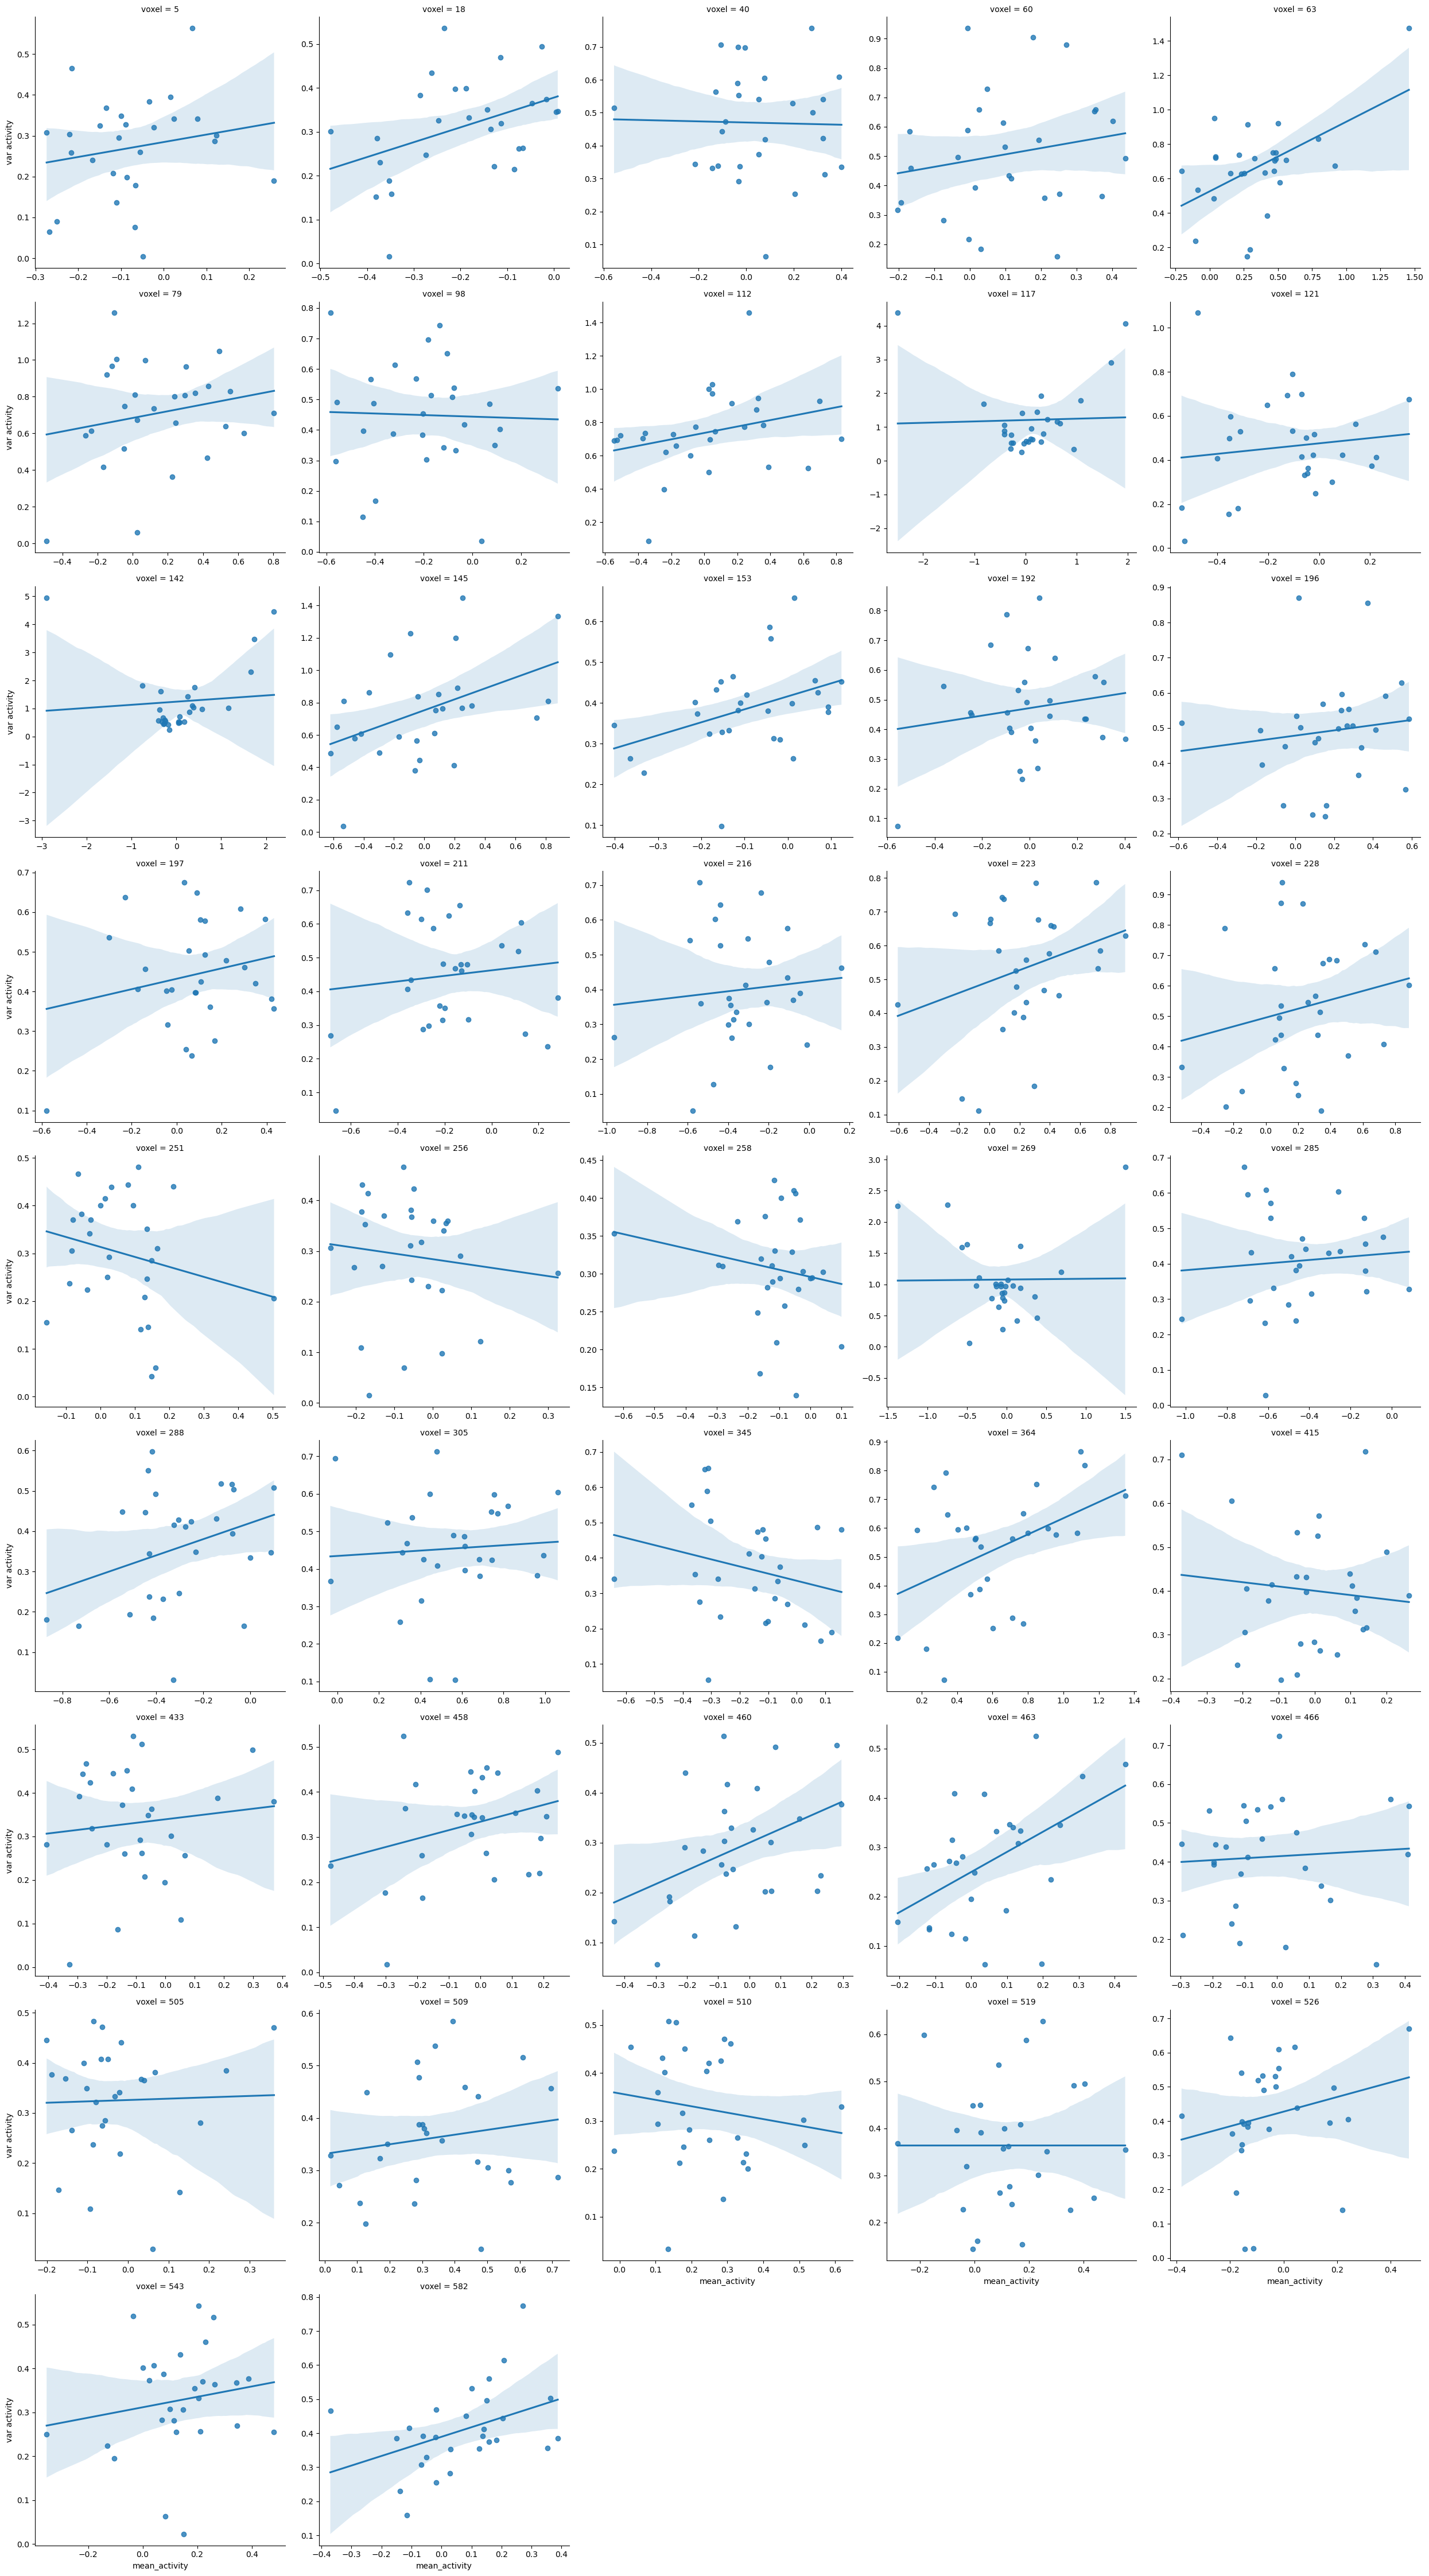

In [249]:
sns.lmplot(x='mean_activity', y='var activity', data=tmp.reset_index(), col='voxel', col_wrap=5,
           facet_kws={'sharex': False, 'sharey': False})

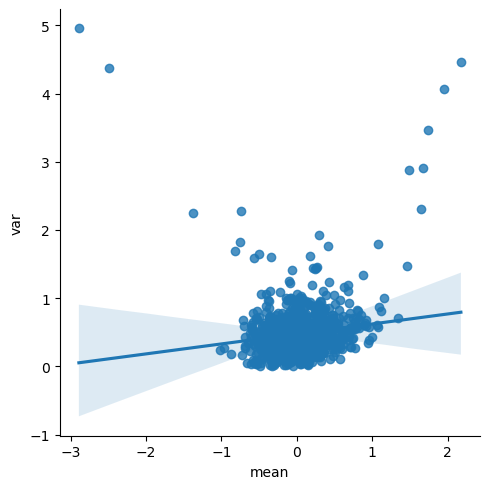

In [250]:
tmp = mean_activations.stack().to_frame('mean').join(var_activations.stack().to_frame('var'))

sns.lmplot(x='mean', y='var', data=tmp.reset_index(), )

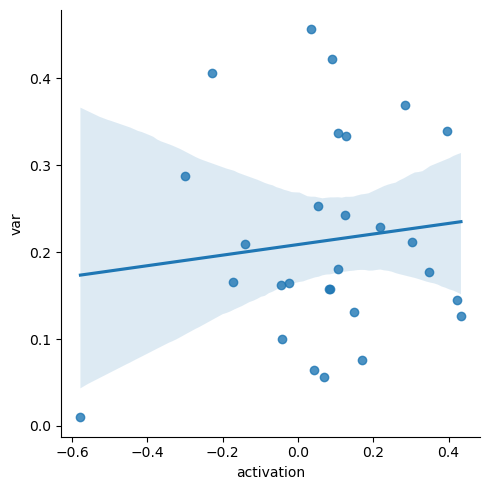

In [251]:
ix = r2_index[2]

tmp = single_trial_activations[ix].to_frame('activation').groupby('n').mean()
tmp = tmp.join(var_n[ix].to_frame('var'))

#.reset_index()

# sns.relplot(tmp, y='activation', x='n', kind='line')

# plt.axvline(pars.loc[ix, 'mu'], c='k', ls='--')

# plt.figure()

# std_n[ix].plot()

# plt.figure()


sns.lmplot(x='activation', y='var', data=tmp.reset_index())

In [107]:
tmp

,n,activation
0,38.0,1.343901
1,35.0,-0.617130
2,30.0,0.295267
3,36.0,0.585161
4,11.0,-1.469918
...,...,...
235,16.0,-1.656283
236,16.0,-0.978369
237,10.0,3.147972
238,14.0,3.582790


<Axes: xlabel='n'>

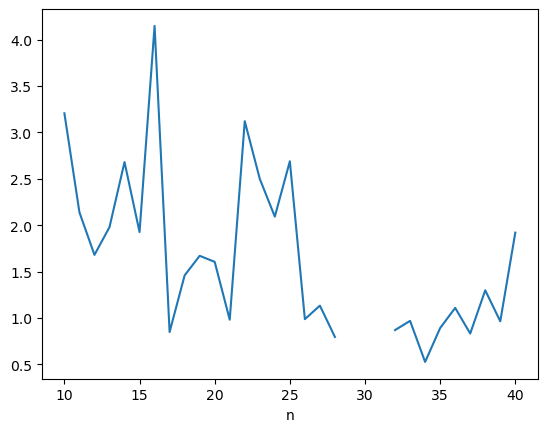

In [102]:
std_n

,0,1,2,3,4,5,6,7,8,9,...,626,627,628,629,630,631,632,633,634,635
n,,,,,,,,,,,,,,,,,,,,,
10.0,0.892794,0.922905,0.833037,1.916699,1.541054,0.798910,1.135291,1.025300,0.682948,1.484087,...,0.396119,0.496607,0.651461,1.109821,0.601057,1.628969,0.625447,1.062053,2.122396,0.864803
11.0,0.933699,0.707422,0.630345,1.395868,1.178361,0.583196,1.060314,0.975180,1.043257,1.352321,...,0.799162,0.684558,0.589980,1.080484,0.652553,0.732546,0.717863,0.839120,1.461333,0.659173
12.0,0.741829,1.018018,0.768086,1.397154,1.102716,0.574376,0.874575,0.485495,0.861308,0.980118,...,0.766603,0.468898,0.695371,0.736573,0.457977,0.773705,0.925188,0.731070,1.654012,0.643588
13.0,1.082990,0.872137,0.808744,1.876382,2.704136,0.982053,1.228717,1.030038,0.957883,1.601534,...,0.756677,0.836795,0.725859,1.306745,0.872407,0.818931,0.662544,0.908670,2.387593,0.662392
14.0,0.887459,0.845343,1.011845,2.172936,1.356403,1.086886,1.146554,0.728248,0.769654,1.472905,...,0.629119,0.682501,0.586895,1.016635,1.080952,0.734596,0.426314,0.810124,1.364919,0.456929
15.0,1.099098,0.743250,0.721947,2.124947,2.801766,0.577645,1.245215,1.088656,1.003249,1.775486,...,0.927571,0.672960,0.588175,0.832921,0.812680,0.883542,0.623300,0.726554,2.020118,0.512857
16.0,0.691600,0.951434,0.684836,1.699558,2.168096,1.146536,1.295943,0.628623,0.912206,0.991981,...,0.854036,0.491299,0.662464,1.057115,0.556869,0.934281,0.759956,1.061734,1.388176,0.667959
17.0,1.093139,1.292792,0.698960,2.568777,2.633082,1.157599,0.907718,1.042211,1.182155,1.285668,...,1.141443,0.652354,0.746960,0.562304,0.715914,0.615397,0.325048,0.490746,2.752458,0.745203
18.0,0.837287,1.311239,0.900845,2.028291,1.709581,1.016267,0.983654,0.492560,1.049828,1.053909,...,0.763816,0.787828,0.588424,1.433071,0.850235,0.541314,0.830214,0.577526,1.203762,0.545466


,0,1,2,3,4,5,6,7,8,9,...,626,627,628,629,630,631,632,633,634,635
n,,,,,,,,,,,,,,,,,,,,,
10.0,0.892794,0.922905,0.833037,1.916699,1.541054,0.798910,1.135291,1.025300,0.682948,1.484087,...,0.396119,0.496607,0.651461,1.109821,0.601057,1.628969,0.625447,1.062053,2.122396,0.864803
11.0,0.933699,0.707422,0.630345,1.395868,1.178361,0.583196,1.060314,0.975180,1.043257,1.352321,...,0.799162,0.684558,0.589980,1.080484,0.652553,0.732546,0.717863,0.839120,1.461333,0.659173
12.0,0.741829,1.018018,0.768086,1.397154,1.102716,0.574376,0.874575,0.485495,0.861308,0.980118,...,0.766603,0.468898,0.695371,0.736573,0.457977,0.773705,0.925188,0.731070,1.654012,0.643588
13.0,1.082990,0.872137,0.808744,1.876382,2.704136,0.982053,1.228717,1.030038,0.957883,1.601534,...,0.756677,0.836795,0.725859,1.306745,0.872407,0.818931,0.662544,0.908670,2.387593,0.662392
14.0,0.887459,0.845343,1.011845,2.172936,1.356403,1.086886,1.146554,0.728248,0.769654,1.472905,...,0.629119,0.682501,0.586895,1.016635,1.080952,0.734596,0.426314,0.810124,1.364919,0.456929
15.0,1.099098,0.743250,0.721947,2.124947,2.801766,0.577645,1.245215,1.088656,1.003249,1.775486,...,0.927571,0.672960,0.588175,0.832921,0.812680,0.883542,0.623300,0.726554,2.020118,0.512857
16.0,0.691600,0.951434,0.684836,1.699558,2.168096,1.146536,1.295943,0.628623,0.912206,0.991981,...,0.854036,0.491299,0.662464,1.057115,0.556869,0.934281,0.759956,1.061734,1.388176,0.667959
17.0,1.093139,1.292792,0.698960,2.568777,2.633082,1.157599,0.907718,1.042211,1.182155,1.285668,...,1.141443,0.652354,0.746960,0.562304,0.715914,0.615397,0.325048,0.490746,2.752458,0.745203
18.0,0.837287,1.311239,0.900845,2.028291,1.709581,1.016267,0.983654,0.492560,1.049828,1.053909,...,0.763816,0.787828,0.588424,1.433071,0.850235,0.541314,0.830214,0.577526,1.203762,0.545466


<Axes: xlabel='n', ylabel='Count'>

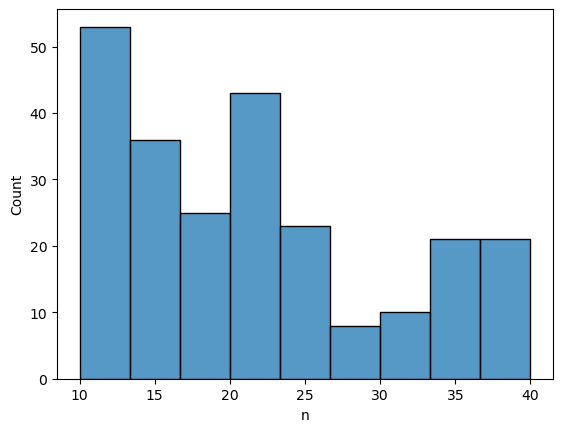

In [77]:
sns.histplot(tmp['n'])

In [62]:
pars['r2'].idxmax()

526

In [20]:
single_trials

In [9]:
t1w = sub.get_t1w()

In [10]:
from nilearn import plotting, image

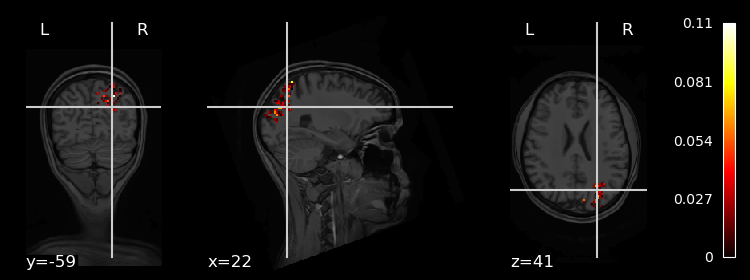

In [12]:
plotting.plot_stat_map(image.index_img(pars, 1), t1w)

In [9]:
pars.shape

(58, 72, 49, 2)